Beautiful Soup transforms a complex HTML document into a complex tree of Python objects.

In [237]:
""" bs4 overview (1/6) """

bs4_documentation = "https://www.crummy.com/software/BeautifulSoup/bs4/doc/"

# pip install beautifulsoup4
from bs4 import BeautifulSoup

with open('index.html', 'r') as f:
    # create bs4 class instance
    doc = BeautifulSoup(f, "html.parser")

print(doc.prettify())


<html>
 <head>
  <title class="title class2" type="boldest">
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's
   </b>
   <i>
    story
   </i>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister other" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ; and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
  <tr class="other">
   row 1: 77
  </tr>
  <tr>
   row 2: 50
  </tr>
  <tr>
   row 3: 6
  </tr>
 </body>
</html>


In [251]:
""" bs4 overview (2/6) """
# directly access html tags. Returns first tag in doc
tag = doc.title
print("name: ", tag.name)
print("attributes: ", tag.attrs)
print("type attribute: ", tag['type'])
print("title tag contents 1: ", tag.string.strip())
print("title tag contents 2: ", tag.text.strip())



name:  title
attributes:  {'class': ['title', 'class2'], 'type': 'boldest'}
type attribute:  boldest
title tag contents 1:  The Dormouse's story
title tag contents 2:  The Dormouse's story


In [239]:
""" bs4 overview (3/6) """

print("# contents: ", doc.body.p.contents)
print("# children: ", doc.body.p.children)
print("# descendants: ", doc.body.p.descendants)

print("")
print("# iterate through children:")
for child in doc.body.p.children:
    print("   ", child)

print("")
print("# iterate through descendents:")
for child in doc.body.p.descendants:
    print("   ", child)

# contents:  [<b>The Dormouse's</b>, <i>story</i>]
# children:  <list_iterator object at 0x000001798A46E9A0>
# descendants:  <generator object Tag.descendants at 0x000001798A46C120>

# iterate through children:
    <b>The Dormouse's</b>
    <i>story</i>

# iterate through descendents:
    <b>The Dormouse's</b>
    The Dormouse's
    <i>story</i>
    story


In [207]:
""" bs4 overview (4/6) """
# Explain difference between find() and find_all()

body_tag = doc.body

print("find() result:")
res = body_tag.find("tr")
print(res)

print("")
print("find_all() result:")
res = body_tag.find_all("tr", limit=2)
print(res)

find() result:
<tr class="other">row 1: 77</tr>

find_all() result:
[<tr class="other">row 1: 77</tr>, <tr>row 2: 50</tr>]


In [246]:
""" bs4 overview (5/6) """
# other arguments possibilities for find() and find_all()

# through attributes
a = body_tag.find_all(id="link2")

# search specific tag that has a given class
b = body_tag.find_all("a", class_="sister")

# search specific tag that has specific attributes
c = body_tag.find_all(attrs={"class": "other"})

# search specific tag that has specific attributes
d = body_tag.find_all("a", {"class": "sister", "id": "link1"})

#

In [247]:
for i, res in enumerate(d): print(i, ': ', res)

0 :  <a class="sister other" href="http://example.com/elsie" id="link1">
                Elsie
            </a>


In [211]:
""" bs4 overview (6/6) """
# regular expressions documentation: https://docs.python.org/3/library/re.html
import re

res = body_tag.find_all(text=re.compile("row.*"))
print(res)

print("")

res = body_tag.find(href=re.compile(".*tillie"))
print(res['href'])



['row 1: 77', 'row 2: 50', 'row 3: 6']

http://example.com/tillie


<!DOCTYPE html>
<html lang="pt">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" id="wixDesktopViewport" name="viewport">
   <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
   <meta content="Wix.com Website Builder" name="generator">
    <link href="https://static.wixstatic.com/media/f09a68_7b803a231616429f90fdbcd1579fb81a%7Emv2.png/v1/fill/w_32%2Ch_32%2Clg_1%2Cusm_0.66_1.00_0.01/f09a68_7b803a231616429f90fdbcd1579fb81a%7Emv2.png" rel="icon" sizes="192x192"/>
    <link href="https://static.wixstatic.com/media/f09a68_7b803a231616429f90fdbcd1579fb81a%7Emv2.png/v1/fill/w_32%2Ch_32%2Clg_1%2Cusm_0.66_1.00_0.01/f09a68_7b803a231616429f90fdbcd1579fb81a%7Emv2.png" rel="shortcut icon" type="image/png">
     <link href="https://static.wixstatic.com/media/f09a68_7b803a231616429f90fdbcd1579fb81a%7Emv2.png/v1/fill/w_32%2Ch_32%2Clg_1%2Cusm_0.66_1.00_0.01/f09a68_7b803a231616429f90fdbcd1579fb81a%7Emv2.png" rel="apple-touch-icon" type="image/png"/>
     <!--
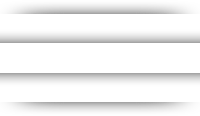
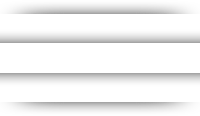
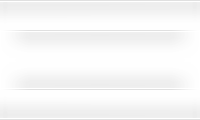
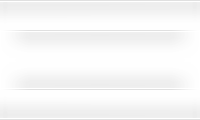

In [229]:
""" extracting html (1/1) """

url = "https://www.sensaway.com/"
is_dynamic = False

# for static pages
if not is_dynamic:
    import requests
    content = requests.get(url)
    doc = BeautifulSoup(content.text, "html.parser")


# for dynamic pages
if is_dynamic:
    from webdriver_manager.chrome import ChromeDriverManager
    from selenium import webdriver

    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(url)
    content = driver.page_source

    doc = BeautifulSoup(content, "html.parser")


print(doc.prettify())

Exemplo prático:
Ir buscar estatísticas dos clubes que participam liga dos campeões 2022/2023
site: https://www.uefa.com/uefachampionsleague/clubs/ 

In [212]:
""" Página do Clube (1/) """

from bs4 import BeautifulSoup
import requests

url_benfica = "https://www.uefa.com/uefachampionsleague/clubs/50147--benfica/"
result = requests.get(url_benfica)

doc_benfica = BeautifulSoup(result.text, "html.parser")
print(doc_benfica.prettify())

<!DOCTYPE html>
<html data-culture="en-GB" data-lang="en" lang="en">
 <head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# website: http://ogp.me/ns/website# ">
  <title>
   Benfica | UEFA Champions League 2022/23 | UEFA.com
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta charset="utf-8"/>
  <meta content="Visit UEFA.com to find out how Benfica are doing in the UEFA Champions League 2022/2023, including latest match news, stats, squad list and news updates." name="description"/>
  <meta content="UEFA.com" name="author"/>
  <meta content="true" name="HandheldFriendly"/>
  <meta content="320" name="MobileOptimized"/>
  <meta content="UEFA.com" name="application-name"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="UEFA.com" name="apple-mobile-web-app-title"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="Benfica - UCL" property="twitt

In [214]:
""" Página do Clube (2/) """

key_stats_tag = doc_benfica.find('div', class_="stats-module")
number_stat_tags = key_stats_tag.find_all('div', class_="stats-module__single-stat--number")

print("### Number of stat elements:")
print("method 1: ", len(number_stat_tags))
print("")

print("### First stat element:")
print(number_stat_tags[0].prettify())
print("")

print("### First stat name and value:")
print(number_stat_tags[0].find_all('div')[0].string)
print(number_stat_tags[0].find_all('div')[1].string)

### Number of stat elements:
method 1:  9

### First stat element:
<div class="stats-module__single-stat stats-module__single-stat--number stats-module__single-stat--">
 <pk-num-stat-item class="" variant="secondary">
  <div slot="stat-value">
   2
  </div>
  <div slot="stat-label">
   Goals
  </div>
 </pk-num-stat-item>
</div>


### First stat name and value:
2
Goals


In [217]:
""" Página do Clube (3/) """

stats = {}

for stat_tag in number_stat_tags:
    divs = stat_tag.find_all('div')
    name = divs[1].string
    value = divs[0].string

    if "%" in name: value = int(value[:-1])
    if name == "Distance covered (km)": value = float(value)

    stats[name] = value

for name, value in stats.items():print(f'{name}: {value}')

Goals: 2
Goals conceded: 0
Possession (%): 54
Passing accuracy (%): 85
Balls recovered: 49
Tackles won: 1
Clean sheets: 1
Saves: 2
Distance covered (km): 117.98


In [218]:
""" Página dos Clubes (1/) """

url_clubs = "https://www.uefa.com/uefachampionsleague/clubs/"
result = requests.get(url_clubs)

doc_clubs = BeautifulSoup(result.text, "html.parser")

group_stage_tag = doc_clubs.find('div', class_="teams-overview_teams-wrapper")
teams_tag = group_stage_tag.find_all('div', class_="team team-is-club", limit=5)

print(teams_tag[0].prettify())



<div class="team team-is-club">
 <a class="team-wrap" href="/uefachampionsleague/clubs/50143--ajax/" title="Ajax">
  <pk-identifier class="team-wrap" type="vertical">
   <span slot="prefix">
    <pk-badge alt="Ajax" badge-title="Ajax" fallback-image="club-generic-badge" src="https://img.uefa.com/imgml/TP/teams/logos/70x70/50143.png">
    </pk-badge>
   </span>
   <span slot="primary">
    Ajax
   </span>
   <span class="team-name__country-code" slot="secondary">
    (NED)
   </span>
  </pk-identifier>
 </a>
</div>



In [219]:
""" Página dos Clubes (2/) """

print(teams_tag[0].a['title'])
print(teams_tag[0].a['href'])
print("")

print("### Full url:")
print("https://www.uefa.com/" + teams_tag[0].a['href'])


Ajax
/uefachampionsleague/clubs/50143--ajax/

### Full url:
https://www.uefa.com//uefachampionsleague/clubs/50143--ajax/


In [225]:
""" Página dos Clubes (3/) """

# estrutura de dados
# [{ 
#   "name": "team1"
#   "url": "www.exemplo.com",
#   "stat1": 3,    
#   "stat2": 3,    
#   (...)    
#  },
#  { (...) }
# ]

teams = []

for team_tag in teams_tag:
    team_name = team_tag.a['title']
    team_url = team_tag.a['href']
    team_url = "https://www.uefa.com" + team_url
    
    teams.append({"name": team_name, "url": team_url})

print(f'Found {len(teams)} teams')
for team in teams: print(f"{team['name']}: {team['url']}")


Found 5 teams
Ajax: https://www.uefa.com/uefachampionsleague/clubs/50143--ajax/
Atlético: https://www.uefa.com/uefachampionsleague/clubs/50124--atletico/
Barcelona: https://www.uefa.com/uefachampionsleague/clubs/50080--barcelona/
Bayern: https://www.uefa.com/uefachampionsleague/clubs/50037--bayern/
Benfica: https://www.uefa.com/uefachampionsleague/clubs/50147--benfica/


In [63]:
""" Página dos Clubes (4/) """


for team in teams:
    print(f"Fetching {team['name']} data...")
    result = requests.get(team['url'])
    doc_club = BeautifulSoup(result.text, "html.parser")

    key_stats_tag = doc_club.find('div', class_="stats-module")
    number_stat_tags = key_stats_tag.find_all('div', class_="stats-module__single-stat--number")

    for stat_tag in number_stat_tags:
        stat_name = stat_tag.find_all('div')[1].string
        stat_value = stat_tag.find_all('div')[0].string

        if "%" in stat_name: stat_value = int(stat_value[:-1])
        if stat_name == "Distance covered (km)": stat_value = float(stat_value)
        else: stat_value = int(stat_value)

        team[stat_name] = stat_value

print(f"___________________________________")   
print(f"Fetched data from {len(teams)} teams")
print("")
print("### All fetched data:")
for team in teams:
    print(team)
    print("")


Fetching Ajax data...
Fetching Atlético data...
Fetching Barcelona data...
Fetching Bayern data...
Fetching Benfica data...
___________________________________
Fetched data from 5 teams

### All fetched data:
{'name': 'Ajax', 'url': 'https://www.uefa.com//uefachampionsleague/clubs/50143--ajax/', 'Goals': 4, 'Goals conceded': 0, 'Possession (%)': 71, 'Passing accuracy (%)': 93, 'Balls recovered': 34, 'Tackles won': 4, 'Clean sheets': 1, 'Saves': 1, 'Distance covered (km)': 113.62}

{'name': 'Atlético', 'url': 'https://www.uefa.com//uefachampionsleague/clubs/50124--atletico/', 'Goals': 2, 'Goals conceded': 1, 'Possession (%)': 51, 'Passing accuracy (%)': 82, 'Balls recovered': 31, 'Tackles won': 1, 'Clean sheets': 0, 'Saves': 2, 'Distance covered (km)': 119.98}

{'name': 'Barcelona', 'url': 'https://www.uefa.com//uefachampionsleague/clubs/50080--barcelona/', 'Goals': 5, 'Goals conceded': 1, 'Possession (%)': 73, 'Passing accuracy (%)': 92, 'Balls recovered': 33, 'Tackles won': 4, 'Clean 

In [64]:
""" Gravar os dados para processamento """

import pandas as pd

data = pd.DataFrame(teams)
data.head()


,name,url,Goals,Goals conceded,Possession (%),Passing accuracy (%),Balls recovered,Tackles won,Clean sheets,Saves,Distance covered (km)
0,Ajax,https://www.uefa.com//uefachampionsleague/club...,4,0,71,93,34,4,1,1,113.62
1,Atlético,https://www.uefa.com//uefachampionsleague/club...,2,1,51,82,31,1,0,2,119.98
2,Barcelona,https://www.uefa.com//uefachampionsleague/club...,5,1,73,92,33,4,0,0,116.82
3,Bayern,https://www.uefa.com//uefachampionsleague/club...,2,0,51,90,38,6,1,2,117.26
4,Benfica,https://www.uefa.com//uefachampionsleague/club...,2,0,54,85,49,1,1,2,117.98
